In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import os
from pathlib import Path
from glob import glob
import numpy as np

In [2]:
path = os.path.join(os.getcwd(),'../run')

In [3]:
dsets = []

for i in range(1,4+1):
    fnames = glob(os.path.join(path,"MNC_*/state*{}.nc".format(i)))
    fnames.sort()
    di = xr.open_mfdataset(fnames,combine='by_coords',concat_dim='T')
    di = di.assign({
        'U':di.U.interp(Xp1=di.X),
        'V':di.V.interp(Yp1=di.Y),
        'W':di.W.interp(Zl=di.Z),
    }).drop(['Xp1','Yp1','Zl','iter'])
    dsets.append(di)
    
data = xr.combine_nested([xr.combine_nested([dsets[0],dsets[1]],concat_dim='X'),
                          xr.combine_nested([dsets[2],dsets[3]],concat_dim='X')],
                         concat_dim='X')
data = data.isel(Y=0)
data

<xarray.Dataset>
Dimensions:  (T: 1, X: 1000, Z: 100)
Coordinates:
  * T        (T) float64 0.0
    Y        float64 5.0
  * Z        (Z) float64 -0.05 -0.15 -0.25 -0.35 ... -9.65 -9.75 -9.85 -9.95
  * X        (X) float64 0.05 0.15 0.25 0.35 0.45 ... 99.65 99.75 99.85 99.95
Data variables:
    U        (T, Z, X) float64 0.0 -0.2399 -0.4799 ... -0.3197 -0.1599 0.0
    V        (T, Z, X) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    Temp     (T, Z, X) float32 10.0 10.0 10.0 ... 9.800001 9.800001 9.800001
    S        (T, Z, X) float32 0.0 35.0 35.0 35.0 35.0 ... 35.0 35.0 35.0 35.0
    Eta      (T, X) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    W        (T, Z, X) float64 0.0 47.75 0.0 0.0 0.0 0.0 ... nan nan nan nan nan
    phi_nh   (T, Z, X) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

# West

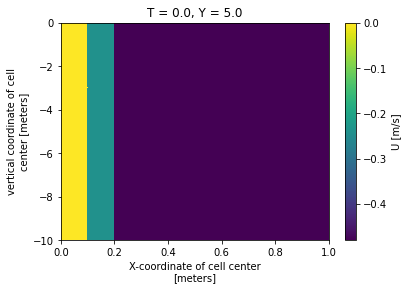

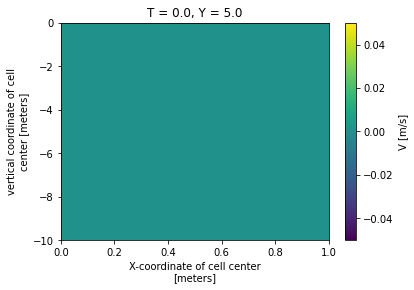

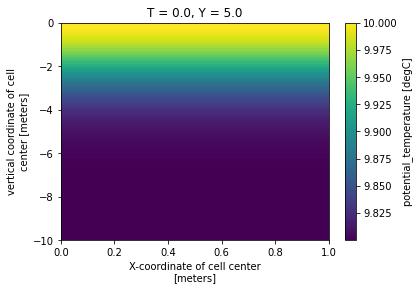

In [7]:
plt.figure()
data.U.isel(T=0,X=slice(None,10)).plot(y='Z')

plt.figure()
data.V.isel(T=0,X=slice(None,10)).plot(y='Z')

plt.figure()
data.Temp.isel(T=0,X=slice(None,10)).plot(y='Z')

# East

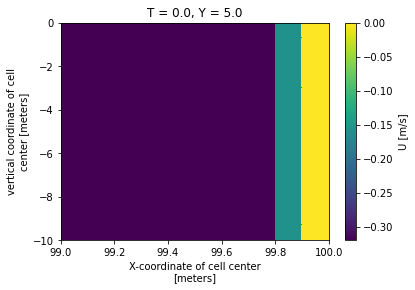

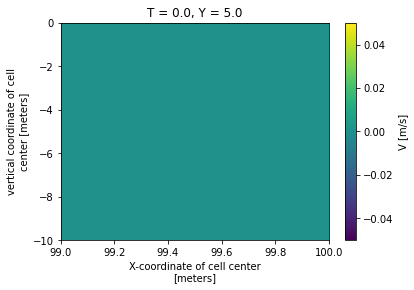

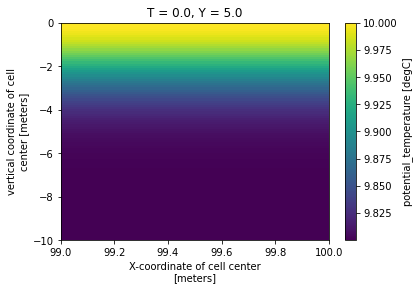

In [8]:
plt.figure()
data.U.isel(T=0,X=slice(-10,None)).plot(y='Z')

plt.figure()
data.V.isel(T=0,X=slice(-10,None)).plot(y='Z')

plt.figure()
data.Temp.isel(T=0,X=slice(-10,None)).plot(y='Z')